<a href="https://colab.research.google.com/github/bonaguidin/Supervised_Linear_Regression/blob/main/Final_Project_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>

<h1 align="center"><font size="5">Supervised Machine Learning: Regression - Final Assignment</font></h1>


## Instructions:

In this Assignment, you will demonstrate the data regression skills you have learned by completing this course. You are expected to leverage a wide variety of tools, but also this report should focus on present findings, insights, and next steps. You may include some visuals from your code output, but this report is intended as a summary of your findings, not as a code review.

The grading will center around 5 main points:

1. Does the report include a section describing the data?
2. Does the report include a paragraph detailing the main objective(s) of this analysis?
3. Does the report include a section with variations of linear regression models and specifies which one is the model that best suits the main objective(s) of this analysis.
4. Does the report include a clear and well-presented section with key findings related to the main objective(s) of the analysis?
5. Does the report highlight possible flaws in the model and a plan of action to revisit this analysis with additional data or different predictive modeling techniques?




## Download Dataset
https://drive.google.com/file/d/1BTYzKReDDaGQqYuRUXlv7ku57X1YVq5T/view?usp=sharing

In [ ]:
# Install the required libraries
!pip install -U scikit-learn
!pip install pandas
!pip install numpy
!pip install seaborn
!pip install matplotlib
!pip install gdown
!pip install statsmodels
!pip install scipy
!pip install sklearn
!pip install tqdm
!pip install optuna
!pip install kagglehub

# Clear the current cell's output if no error occurred
from IPython.display import clear_output
clear_output()

## Import the required libraries


In [ ]:
import kagglehub  # For accessing Kaggle datasets
import os
import pandas as pd  # For data manipulation
import numpy as np  # For numerical operations
import matplotlib.pyplot as plt  # For visualizations
import seaborn as sns  # For statistical visualizations
import requests  # For making HTTP requests
import gdown  # For downloading files from Google Drive
from io import StringIO  # For handling string data
import statsmodels.formula.api as smf  # For statistical modeling
import statsmodels.api as sm  # For statistical modeling
from scipy.stats import skew  # For statistical analysis
from scipy.stats.mstats import winsorize  # For outlier handling
from sklearn.model_selection import train_test_split, cross_val_score  # For splitting and evaluation
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, LabelEncoder, PowerTransformer, QuantileTransformer  # For polynomial features and scaling
from sklearn.linear_model import LinearRegression, Ridge, Lasso  # For linear regression models
from sklearn.metrics import mean_squared_error, r2_score  # For evaluation metrics
from tqdm.notebook import tqdm
from datetime import datetime, timedelta  # For handling dates and times
from time import time
from optuna import create_study # Hyperparameter search
from optuna.samplers import TPESampler

## Importing the Dataset


In [ ]:
# Download latest version
path = kagglehub.dataset_download("ruchikakumbhar/obesity-prediction")

print("Path to dataset files:", path)

# Find the CSV file within the downloaded directory
csv_file = next((f for f in os.listdir(path) if f.endswith('.csv')), None)

# Construct the full path to the CSV file
file_path = os.path.join(path, csv_file) if csv_file else None

if file_path:
  data = pd.read_csv(file_path)
else:
  print("No CSV file found in the directory.")

data.head()

100%|██████████| 57.5k/57.5k [00:00<00:00, 18.1MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/ruchikakumbhar/obesity-prediction/versions/1


,Gender,Age,Height,Weight,family_history,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,Obesity
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


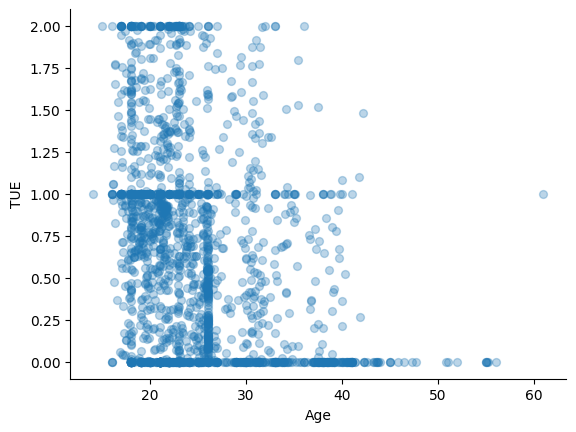

In [ ]:
# Age vs. TUE (Tech use)
data.plot(kind='scatter', x='Age', y='TUE', s=32, alpha=.3)
plt.gca().spines[['top', 'right',]].set_visible(False)

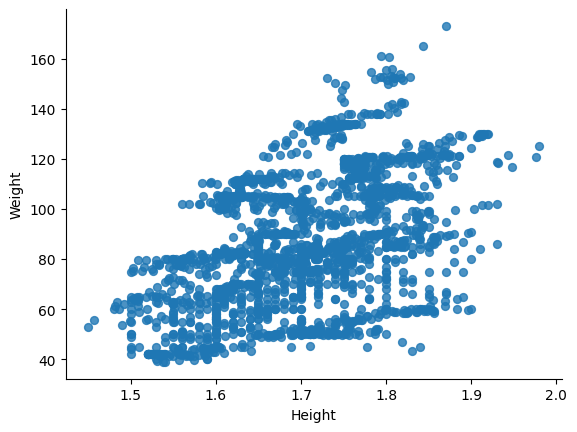

In [ ]:
# Height vs. Weight
data.plot(kind='scatter', x='Height', y='Weight', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

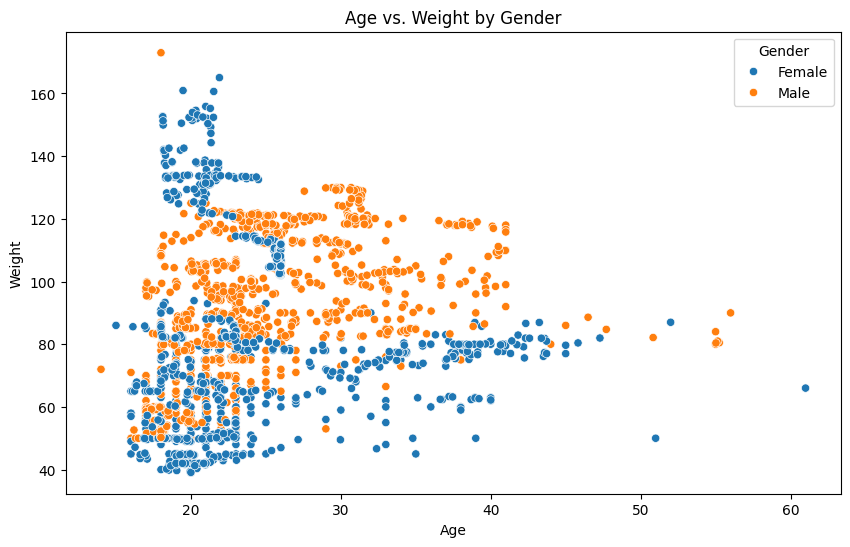

In [ ]:
# Age vs. Weight by Gender

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Weight', hue='Gender', data=data)
plt.title('Age vs. Weight by Gender')
plt.xlabel('Age')
_ = plt.ylabel('Weight')

Once you have selected a data set, you will produce the deliverables listed below and submit them to one of your peers for review. Treat this exercise as an opportunity to produce analysis that are ready to highlight your analytical skills for a senior audience, for example, the Chief Data Officer, or the Head of Analytics at your company.
Sections required in your report:

*   Main objective of the analysis that specifies whether your model will be focused on prediction or interpretation.
*   Brief description of the data set you chose and a summary of its attributes.
*   Brief summary of data exploration and actions taken for data cleaning and feature engineering.
*   Summary of training at least three linear regression models which should be variations that cover using a simple  linear regression as a baseline, adding polynomial effects, and using a regularization regression. Preferably, all use the same training and test splits, or the same cross-validation method.
*  A paragraph explaining which of your regressions you recommend as a final model that best fits your needs in terms of accuracy and explainability.
*  Summary Key Findings and Insights, which walks your reader through the main drivers of your model and insights from your data derived from your linear regression model.
*  Suggestions for next steps in analyzing this data, which may include suggesting revisiting this model adding specific data features to achieve a better explanation or a better prediction.


# 1. About the Data


##Dataset Summary

**Domain:** Obesity dataset from Kaggle.

**Objective:** _Predict_ likelihood of Obesity and understand which features impact Obesity.

**Key Features:** Obesity (target variable), Weight, Height, Age, Family_history, CAEC_Frequently, etc,.

This dataset includes data for the estimation of obesity levels in individuals from the countries of Mexico, Peru and Colombia, based on their eating habits and physical condition.
The data contains 17 attributes and 2111 records, the records are labeled with the class variable NObesity (Obesity Level), that allows classification of the data using the values of Insufficient Weight, Normal Weight, Overweight Level I, Overweight Level II, Obesity Type I, Obesity Type II and Obesity Type III.

# 2. Objectives


Testing our hypothesis:
Age, Height and Weight will contribute most to obese patients.

### Steps

*1.* Interpret and visualize key features/data.

*2.* Remove/transform features (Age and NCP).

 - *2a.* Performed Log, Cube Root, Yeo-Johnson, Quantile (normal), and Winsorized transformations on skewed features to determine the best approaches.

*3.* Encode dataset.

*4.* Test for multicollinearity and drop/combine redundant data.

*5.* Determine feature correlation strength.

*6.* Begin modeling and attempt to get the highest possible R2 score using Ridge, Lasso and Elastic Net models + optimization techniques like Bayesian Optimization.

*7.* Present key findings and recommended next steps.

# 3. Linear Regression Models


## **EDA & Visualization**

In [ ]:
# Overview of Dataset

print("Dataset Shape:", data.shape)
print("-----------")
print(data.info())
print("-----------")
print(data.describe())
print("-----------")
print(data.isnull().sum())

Dataset Shape: (2111, 17)
-----------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          2111 non-null   object 
 1   Age             2111 non-null   float64
 2   Height          2111 non-null   float64
 3   Weight          2111 non-null   float64
 4   family_history  2111 non-null   object 
 5   FAVC            2111 non-null   object 
 6   FCVC            2111 non-null   float64
 7   NCP             2111 non-null   float64
 8   CAEC            2111 non-null   object 
 9   SMOKE           2111 non-null   object 
 10  CH2O            2111 non-null   float64
 11  SCC             2111 non-null   object 
 12  FAF             2111 non-null   float64
 13  TUE             2111 non-null   float64
 14  CALC            2111 non-null   object 
 15  MTRANS          2111 non-null   object 
 16  Obesity         2111 non-null   object 


In [ ]:
# Check frequency of each unique value in a given feature

data['Obesity'].value_counts()

,count
Obesity,
Obesity_Type_I,351
Obesity_Type_III,324
Obesity_Type_II,297
Overweight_Level_I,290
Overweight_Level_II,290
Normal_Weight,287
Insufficient_Weight,272


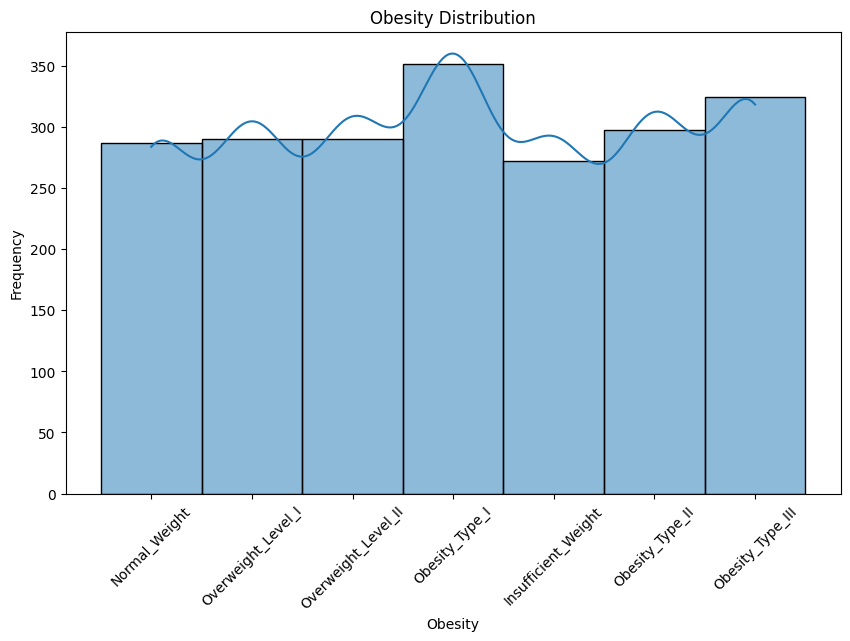

In [ ]:
# Visualize sales distribution

plt.figure(figsize=(10, 6))
sns.histplot(data['Obesity'], bins=30, kde=True)
plt.title('Obesity Distribution')
plt.xlabel('Obesity')
plt.ylabel('Frequency')
plt.xticks(rotation= 45)
plt.show()

## **Skew Analysis**

In [ ]:
# Analize and visualize skewed features (No Transformation yet)

# Identify numerical features
numerical_features = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

# Calculate pre-transformation skewness
pre_skewness = data[numerical_features].apply(lambda x: skew(x.dropna()))
print("Pre-Transformation Skewness:")
print(pre_skewness)

# Select features with high skewness
skewed_features = pre_skewness[abs(pre_skewness) > 0.75].index
print(f"Skewed Features: {list(skewed_features)}")

Pre-Transformation Skewness:
Age       1.528014
Height   -0.012846
Weight    0.255229
FCVC     -0.432598
NCP      -1.106310
CH2O     -0.104837
FAF       0.498135
TUE       0.618063
dtype: float64
Skewed Features: ['Age', 'NCP']


In [ ]:
# Apply transformations to skewed features
for feature in skewed_features:
    if (data[feature] > 0).all():  # Check if all values are positive
        data[feature] = np.log1p(data[feature])  # Log transform
        print(f"Applied log transformation to {feature}")
    else:
        pt = PowerTransformer(method='yeo-johnson')  # Handles both positive and negative values
        data[feature] = pt.fit_transform(data[[feature]])
        print(f"Applied Yeo-Johnson transformation to {feature}")

# Calculate post-transformation skewness
post_skewness = data[numerical_features].apply(lambda x: skew(x.dropna()))
print("\nPost-Transformation Skewness:")
print(post_skewness)

Applied log transformation to Age
Applied log transformation to NCP

Post-Transformation Skewness:
Age       0.887986
Height   -0.012846
Weight    0.255229
FCVC     -0.432598
NCP      -1.434740
CH2O     -0.104837
FAF       0.498135
TUE       0.618063
dtype: float64



Skewness Comparison:
        Pre-Transformation  Post-Transformation
Age               1.528014             0.887986
Height           -0.012846            -0.012846
Weight            0.255229             0.255229
FCVC             -0.432598            -0.432598
NCP              -1.106310            -1.434740
CH2O             -0.104837            -0.104837
FAF               0.498135             0.498135
TUE               0.618063             0.618063


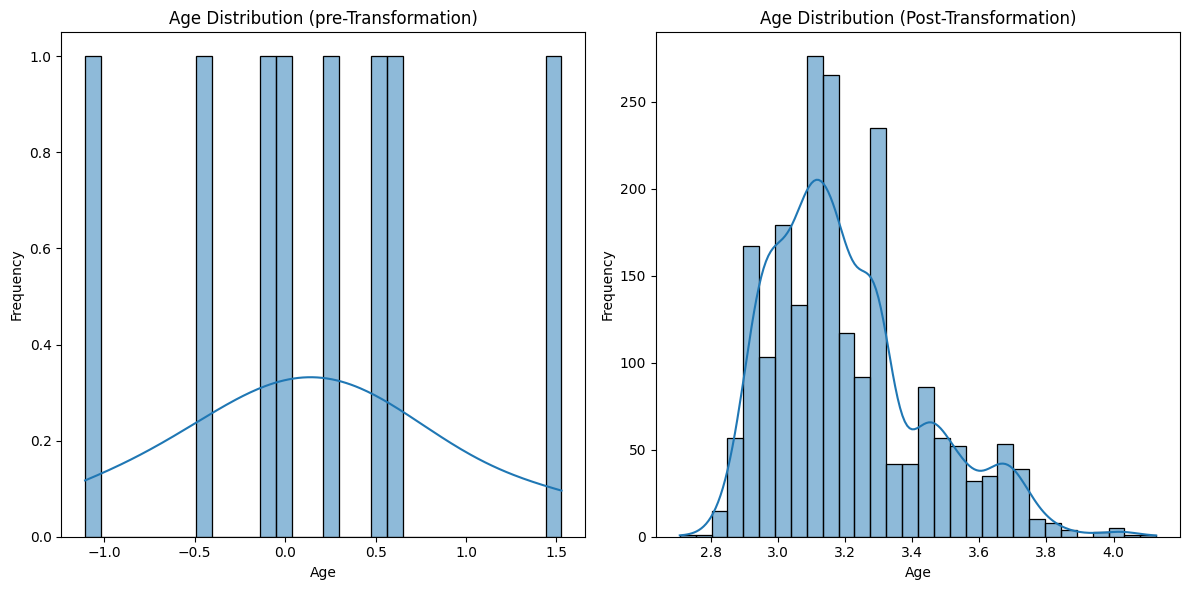

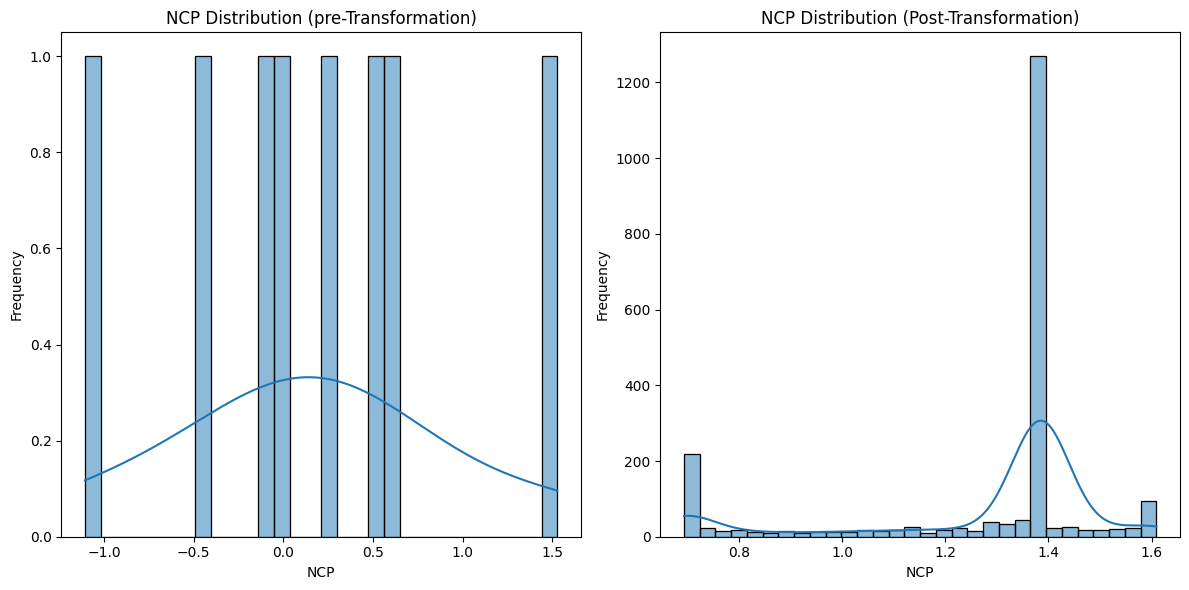

In [ ]:
# Compare pre- and post-transformation skewness
skew_comparison = pd.DataFrame({'Pre-Transformation': pre_skewness, 'Post-Transformation': post_skewness})
print("\nSkewness Comparison:")
print(skew_comparison)

for feature in skewed_features:
    plt.figure(figsize=(12, 6))

    # Before transformation
    plt.subplot(1, 2, 1)
    sns.histplot(pre_skewness, kde=True, bins=30)
    plt.title(f'{feature} Distribution (pre-Transformation)')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

    # After transformation
    plt.subplot(1, 2, 2)
    sns.histplot(data[feature], kde=True, bins=30)
    plt.title(f'{feature} Distribution (Post-Transformation)')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

    plt.tight_layout()
    plt.show()

## **Feature Encoding**

In [ ]:
# Begin encoding non-numeric features

# Map boolean features to binary values
data['Gender'] = data['Gender'].map({'Male': 0, 'Female': 1})
data['family_history'] = data['family_history'].map({'no': 0, 'yes': 1})
data['FAVC'] = data['FAVC'].map({'no': 0, 'yes': 1})
data['SMOKE'] = data['SMOKE'].map({'no': 0, 'yes': 1})
data['SCC'] = data['SCC'].map({'no': 0, 'yes': 1})

# One-hot encode other categorical features
# Check for existing column names and correct if needed
categorical_features = ['CAEC', 'CALC', 'MTRANS']
for feature in categorical_features:
    if feature not in data.columns:
        print(f"Warning: Column '{feature}' not found in DataFrame. Check for typos or data loading issues.")
        # Optionally, suggest alternative column names or skip encoding for this feature

data = pd.get_dummies(data, columns=categorical_features, drop_first=True)
# The errors='ignore' parameter will skip columns not found in the DataFrame, preventing the KeyError.


# Encode target variable (example: label encoding)
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
data['Obesity'] = label_encoder.fit_transform(data['Obesity'])

# Print label encoding mapping for reference
class_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

# Convert Bool to int
for col in data.select_dtypes(include='bool').columns:
    data[col] = data[col].astype(int)

print("Target Class Mapping:", class_mapping)


print("Encoding complete. Updated dataset shape:", data.shape)

pd.set_option('display.max_columns', None)
data.head()

Target Class Mapping: {'Insufficient_Weight': 0, 'Normal_Weight': 1, 'Obesity_Type_I': 2, 'Obesity_Type_II': 3, 'Obesity_Type_III': 4, 'Overweight_Level_I': 5, 'Overweight_Level_II': 6}
Encoding complete. Updated dataset shape: (2111, 24)


,Gender,Age,Height,Weight,family_history,FAVC,FCVC,NCP,SMOKE,CH2O,SCC,FAF,TUE,Obesity,CAEC_Frequently,CAEC_Sometimes,CAEC_no,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,1,3.091042,1.62,64.0,1,0,2.0,1.386294,0,2.0,0,0.0,1.0,1,0,1,0,0,0,1,0,0,1,0
1,1,3.091042,1.52,56.0,1,0,3.0,1.386294,1,3.0,1,3.0,0.0,1,0,1,0,0,1,0,0,0,1,0
2,0,3.178054,1.80,77.0,1,0,2.0,1.386294,0,2.0,0,2.0,1.0,1,0,1,0,1,0,0,0,0,1,0
3,0,3.332205,1.80,87.0,0,0,3.0,1.386294,0,2.0,0,2.0,0.0,5,0,1,0,1,0,0,0,0,0,1
4,0,3.135494,1.78,89.8,0,0,2.0,0.693147,0,2.0,0,0.0,0.0,6,0,1,0,0,1,0,0,0,1,0


In [ ]:
# Convert boolean columns to integers individually
# The loop ensures each boolean column is treated separately, avoiding the ValueError

### RUN AGAIN IF BOOL VALUES ARE STILL STRINGS ###
for col in data.select_dtypes(include='bool').columns:
    data[col] = data[col].astype(int)

## **Multicollinearity Analysis**

In [ ]:
# Check for multicollinearity strength

# Calculate the correlation matrix
correlation_matrix = data.corr()

# Set a threshold for high correlation (e.g., > 0.75 or < -0.75)
threshold = 0.75
high_correlation = correlation_matrix[(correlation_matrix > threshold) & (correlation_matrix != 1.0)]

# Display pairs of features with high correlation
print("Highly Correlated Feature Pairs:")
for col in high_correlation.columns:
    high_corr_features = high_correlation[col].dropna().index.tolist()
    if high_corr_features:
        print(f"{col} is highly correlated with: {high_corr_features}")


Highly Correlated Feature Pairs:


## Feature Correlation Strength

In [ ]:
# Calculate correlation strength of features with the target variable
correlations = data.corr()['Obesity'].drop('Obesity')  # Exclude the target itself

# Sort features by correlation strength (absolute value)
sorted_correlations = correlations.abs().sort_values(ascending=False)

# Display sorted correlations with the target
print(sorted_correlations)


Weight                          0.387643
CAEC_Frequently                 0.351827
CAEC_Sometimes                  0.316962
family_history                  0.313667
Age                             0.257811
CALC_no                         0.134716
FAF                             0.129564
CALC_Sometimes                  0.114104
CH2O                            0.108868
MTRANS_Walking                  0.073823
TUE                             0.069448
NCP                             0.068734
CAEC_no                         0.066715
SCC                             0.050679
CALC_Frequently                 0.047318
FAVC                            0.044582
Height                          0.038986
MTRANS_Motorbike                0.034293
Gender                          0.024908
SMOKE                           0.023256
FCVC                            0.018522
MTRANS_Bike                     0.017351
MTRANS_Public_Transportation    0.003748
Name: Obesity, dtype: float64


## **Model Developement**

In [ ]:
# Necessary Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import mutual_info_regression, VarianceThreshold
from sklearn.base import BaseEstimator, TransformerMixin
from tqdm.notebook import tqdm

# Custom Transformer: Memory-Efficient Feature Selector
class MemoryEfficientSelector(BaseEstimator, TransformerMixin):
    """Selects top-k features based on statistical or mutual information criteria."""
    def __init__(self, k=25, method='mutual_info'):
        self.k = k
        self.method = method
        self.selected_features_ = None
        self.feature_scores_ = None
        self.feature_names_out_ = None

    def fit(self, X, y):
        # Store input feature names
        self.feature_names_in_ = getattr(X, 'columns', [f"Feature_{i}" for i in range(X.shape[1])])

        if self.method == 'mutual_info':
            self.feature_scores_ = mutual_info_regression(X, y, random_state=42)
        else:
            from sklearn.feature_selection import f_regression
            self.feature_scores_ = f_regression(X, y)[0]
        self.selected_features_ = np.argsort(self.feature_scores_)[-self.k:]

        # Store selected feature names
        if hasattr(X, 'columns'):
            self.feature_names_out_ = [self.feature_names_in_[i] for i in self.selected_features_]
        else:
            self.feature_names_out_ = [f"Feature_{i}" for i in self.selected_features_]
        return self

    def transform(self, X):
        return X[:, self.selected_features_]

    def get_feature_names_out(self, input_features=None):
        """Returns feature names after transformation."""
        return np.array(self.feature_names_out_)

class SelectivePolynomialFeatures(BaseEstimator, TransformerMixin):
    """Generates polynomial and interaction terms selectively."""
    def __init__(self, degree=2, interaction_threshold=0.1):
        self.degree = degree
        self.interaction_threshold = interaction_threshold
        self.feature_importances_ = None
        self.selected_pairs_ = None
        self.feature_names_in_ = None
        self.feature_names_out_ = None
        self.important_features_ = None

    def fit(self, X, y):
        # Store input feature names
        self.feature_names_in_ = getattr(X, 'columns', [f"Feature_{i}" for i in range(X.shape[1])])

        # Calculate correlation for each feature with the target
        self.feature_importances_ = np.abs([
            np.corrcoef(X[:, i], y)[0, 1] if np.std(X[:, i]) > 0 else 0
            for i in range(X.shape[1])
        ])

        # Select important features based on threshold
        self.important_features_ = np.where(self.feature_importances_ > self.interaction_threshold)[0]
        self.selected_pairs_ = [
            (i, j) for i in self.important_features_ for j in self.important_features_ if i < j
        ]

        # Generate feature names for transformation
        self.feature_names_out_ = self._generate_features(X)
        return self

    def _generate_features(self, X):
        """Generate features and their names."""
        features = []
        feature_names = []

        # Original features
        features.append(X)
        feature_names.extend(self.feature_names_in_)

        # Polynomial terms
        for i in self.important_features_:
            for degree in range(2, self.degree + 1):
                features.append(X[:, i:i+1] ** degree)
                feature_names.append(f"{self.feature_names_in_[i]}^{degree}")

        # Interaction terms
        for i, j in self.selected_pairs_:
            features.append((X[:, i] * X[:, j]).reshape(-1, 1))
            feature_names.append(f"{self.feature_names_in_[i]}*{self.feature_names_in_[j]}")

        self.features_ = features
        return feature_names

    def transform(self, X):
        features = []
        # Original features
        features.append(X)

        # Polynomial terms
        for i in self.important_features_:
            for degree in range(2, self.degree + 1):
                features.append(X[:, i:i+1] ** degree)

        # Interaction terms
        for i, j in self.selected_pairs_:
            features.append((X[:, i] * X[:, j]).reshape(-1, 1))

        return np.hstack(features)

    def get_feature_names_out(self, input_features=None):
        """Get output feature names for transformation."""
        return np.array(self.feature_names_out_)

# Function to Create Final Pipeline
def create_final_pipeline(model, best_params):
    return Pipeline([
        ('outlier_filter', RobustScaler(quantile_range=(1, 99))),
        ('variance_threshold', VarianceThreshold(threshold=0.01)),
        ('feature_selection', MemoryEfficientSelector(k=best_params['feature_selection__k'])),
        ('selective_poly', SelectivePolynomialFeatures(
            degree=best_params['selective_poly__degree'],
            interaction_threshold=best_params['selective_poly__interaction_threshold']
        )),
        ('scaler', StandardScaler()),
        ('model', model.set_params(alpha=best_params['model__alpha']))
    ])




# Dataset Loading
X = data.drop('Obesity', axis=1)
y = data['Obesity']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Best Parameters
best_ridge_params = {'model__alpha': 23.03, 'selective_poly__degree': 3, 'selective_poly__interaction_threshold': 0.055, 'feature_selection__k': 24}
best_lasso_params = {'model__alpha': 0.0114, 'selective_poly__degree': 3, 'selective_poly__interaction_threshold': 0.05, 'feature_selection__k': 25}
best_elasticnet_params = {'model__alpha': 0.0171, 'selective_poly__degree': 3, 'selective_poly__interaction_threshold': 0.061, 'feature_selection__k': 25}

# Model Training
models = {
    'Ridge': (Ridge(tol=1e-4, max_iter=2000), best_ridge_params),
    'Lasso': (Lasso(tol=1e-4, max_iter=2000, warm_start=True, selection='random'), best_lasso_params),
    'ElasticNet': (ElasticNet(tol=1e-4, max_iter=2000, warm_start=True, selection='random'), best_elasticnet_params)
}

results = {}  # Dictionary to store results
for name, (model, params) in models.items():
    pipeline = create_final_pipeline(model, params) # Create Pipeline
    pipeline.fit(X_train, y_train) # Fit Pipeline
    y_pred = pipeline.predict(X_test)
    results[name] = {
        'R²': r2_score(y_test, y_pred),
        'MAE': mean_absolute_error(y_test, y_pred),
        'RMSE': np.sqrt(mean_squared_error(y_test, y_pred))
    }
    print(f"{name} Results: {results[name]}")

    # Store the fitted pipeline back in the 'models' dictionary
    models[name] = (pipeline, params)




Ridge Results: {'R²': 0.4318317609777089, 'MAE': 1.0739233156220076, 'RMSE': 1.4485663216465015}
Lasso Results: {'R²': 0.4709793534827599, 'MAE': 1.0703138444915168, 'RMSE': 1.3977716201985124}
ElasticNet Results: {'R²': 0.4714933067652405, 'MAE': 1.0794973752364927, 'RMSE': 1.3970924747965294}


#### Predictions

The first column displays which row from our dataset we are referring to. Each of the three models then predicts which weight class an individual belongs to. If all three are the same (3, 3, 3) we can assume some fair accuracy.

In [ ]:
# Make predictions using each model
y_pred_ridge = models['Ridge'][0].predict(X_test)
y_pred_lasso = models['Lasso'][0].predict(X_test)
y_pred_elasticnet = models['ElasticNet'][0].predict(X_test)

# Create a DataFrame to store predictions
predictions_df = pd.DataFrame({
    'Ridge': y_pred_ridge,
    'Lasso': y_pred_lasso,
    'ElasticNet': y_pred_elasticnet
}, index=X_test.index)  # Use the index of X_test for predictions_df

display(predictions_df)

,Ridge,Lasso,ElasticNet
544,-0.181183,-0.048328,-0.426558
1987,3.886611,3.908044,3.882323
420,0.267473,0.739350,1.822853
527,-0.573192,-0.497581,-0.371753
196,4.158872,4.162340,4.342024
...,...,...,...
447,3.842649,3.959119,3.837928
1793,3.631332,3.595565,3.620284
73,3.902088,3.702154,3.463392
1711,3.081774,3.118678,3.177513


### Visualizing findings

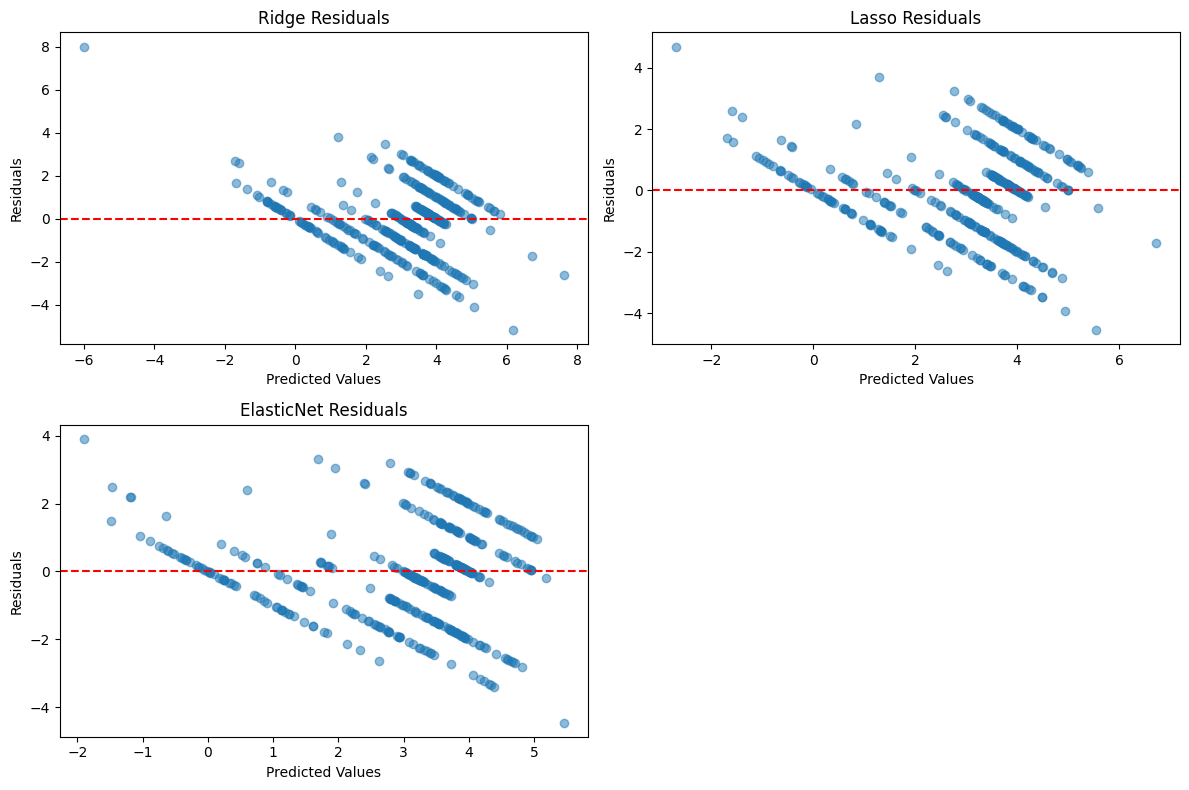

In [ ]:
# @title Residuals plot
# @markdown Determine if linear models fit our data

# Calculate residuals for each model
residuals_ridge = y_test - predictions_df['Ridge']
residuals_lasso = y_test - predictions_df['Lasso']
residuals_elasticnet = y_test - predictions_df['ElasticNet']

# Create residual plots
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.scatter(predictions_df['Ridge'], residuals_ridge, alpha=0.5)
plt.title('Ridge Residuals')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='--')

plt.subplot(2, 2, 2)
plt.scatter(predictions_df['Lasso'], residuals_lasso, alpha=0.5)
plt.title('Lasso Residuals')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='--')

plt.subplot(2, 2, 3)
plt.scatter(predictions_df['ElasticNet'], residuals_elasticnet, alpha=0.5)
plt.title('ElasticNet Residuals')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='--')

plt.tight_layout()
plt.show()

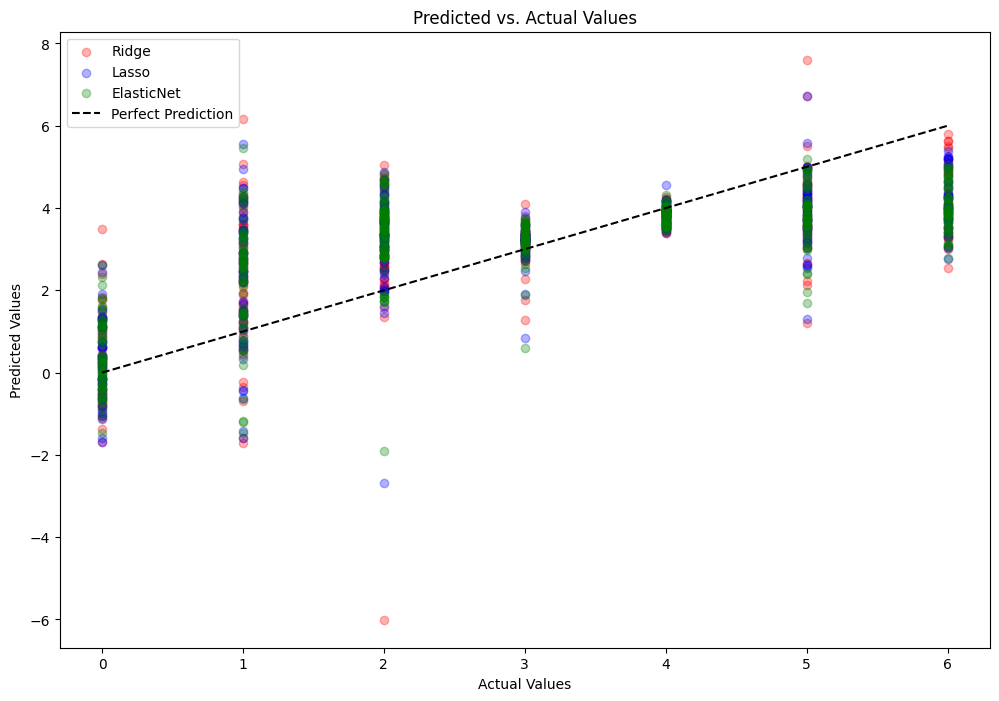

In [ ]:
# @title Ridge vs Lasso vs ElasticNet

plt.figure(figsize=(12, 8))  # Adjust figure size if needed

# Ridge predictions vs actual
plt.scatter(y_test, predictions_df['Ridge'], color='red', alpha=0.3, label='Ridge')

# Lasso predictions vs actual
plt.scatter(y_test, predictions_df['Lasso'], color='blue', alpha=0.3, label='Lasso')

# ElasticNet predictions vs actual
plt.scatter(y_test, predictions_df['ElasticNet'], color='green', alpha=0.3, label='ElasticNet')

# Add a diagonal line for reference (perfect predictions)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
         linestyle='--', color='black', label='Perfect Prediction')

plt.title('Predicted vs. Actual Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

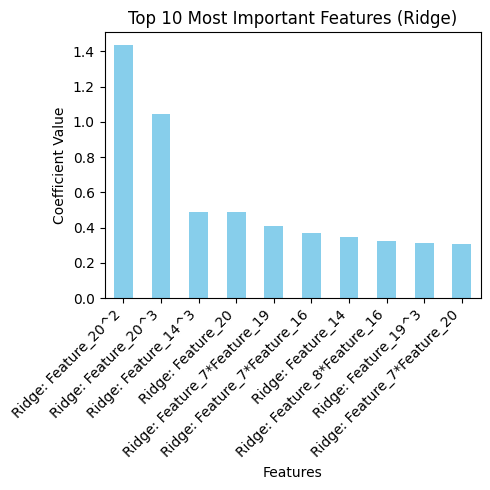

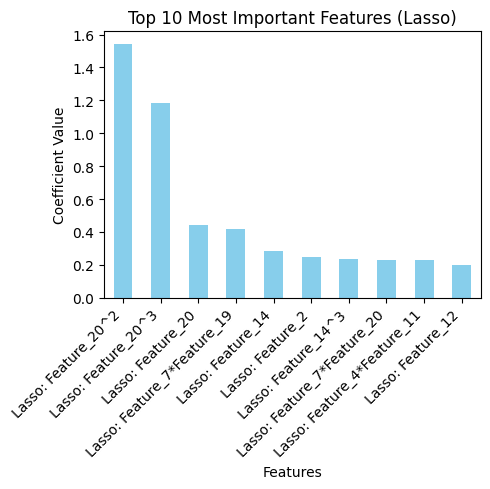

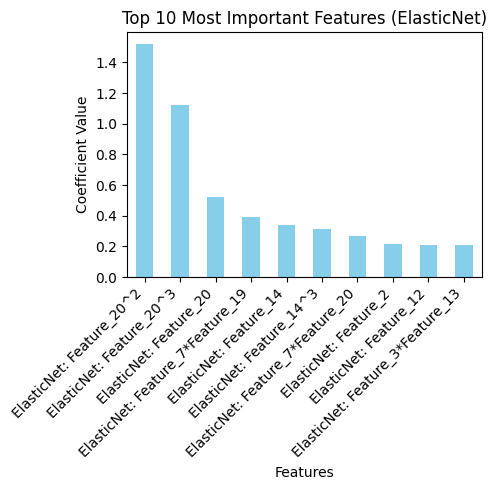

In [ ]:
# @title Feature importance

def get_top_features_with_names(pipeline, model_name, top_n=10):
    """Get top features with interpretable names."""
    # Get transformed feature names
    poly_features = pipeline.named_steps['selective_poly']
    feature_names = poly_features.get_feature_names_out()

    # Get model coefficients
    model_coef = pipeline.named_steps['model'].coef_

    # Verify lengths match
    if len(model_coef) != len(feature_names):
        print(f"Warning: Coefficient length ({len(model_coef)}) != feature names length ({len(feature_names)})")
        return pd.Series()

    # Create series with feature importances
    coefficients = pd.Series(np.abs(model_coef), index=feature_names)
    coefficients = coefficients.sort_values(ascending=False)

    # Get top features
    top_features = coefficients.head(top_n)
    top_features.index = [f"{model_name}: {feature}" for feature in top_features.index]

    return top_features


# Accessing pipelines from the 'models' dictionary
top_ridge_features = get_top_features_with_names(models['Ridge'][0], "Ridge")
top_lasso_features = get_top_features_with_names(models['Lasso'][0], "Lasso")
top_elasticnet_features = get_top_features_with_names(models['ElasticNet'][0], "ElasticNet")

# Concatenate top features from all models
all_top_features = pd.concat([top_ridge_features, top_lasso_features, top_elasticnet_features])

# Plotting top features with interpretable names
for model_name, top_features in zip(
    ["Ridge", "Lasso", "ElasticNet"],
    [top_ridge_features, top_lasso_features, top_elasticnet_features]
):
    plt.figure(figsize=(5, 5))
    top_features.plot(kind='bar', color='skyblue')
    plt.title(f"Top 10 Most Important Features ({model_name})")
    plt.ylabel("Coefficient Value")
    plt.xlabel("Features")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

# 4. Insights and key findings


Model scores suggest moderate accuracy, capturing about 47% of the variance. On average, predictions might misclassify by one or two obesity levels (MAE), with some larger errors present (RMSE). Given the limitations, it is worth exploring other models that are more suitable for handling the ordinal nature of the target variable.

### Optimization Results Summary

After running our models through Bayesian Optimization, we have the following results:
- **Ridge**:
  - Best Parameters: `{'model__alpha': 23.03, 'selective_poly__degree': 3, 'selective_poly__interaction_threshold': 0.054, 'feature_selection__k': 24}`
  - Test R²: 0.4515
  
- **Lasso**:
  - Best Parameters: `{'model__alpha': 0.0114, 'selective_poly__degree': 3, 'selective_poly__interaction_threshold': 0.050, 'feature_selection__k': 20}`
  - Test R²: 0.4742

- **ElasticNet**:
  - Best Parameters: `{'model__alpha': 0.0171, 'selective_poly__degree': 3, 'selective_poly__interaction_threshold': 0.061, 'feature_selection__k': 20}`
  - Test R²: 0.4760

**Pre-skew transformations**
- Ridge Test R²: 0.4344
- Lasso Test R²: 0.4673
- ElasticNet Test R²: 0.4708

**Post-skew transformations**
- Ridge Test R²: 0.4324
- Lasso Test R²: 0.4710
- ElasticNet Test R²: 0.4715

**Model Performance without polynomial features**
- Ridge Test R²: 0.3753
- Lasso Test R²: 0.4250
- ElasticNet Test R²: 0.4171

**Full Model Training**
- Ridge Test R²: 0.4324
- Lasso Test R²: 0.4710
- ElasticNet Test R²: 0.4715

### Determining best polynomial degree

As seen in the graph, we determined the optimal polynomial degree to use was 3. After 3 you can see the model begin to overfit and fall off then bounce back suggesting instability.

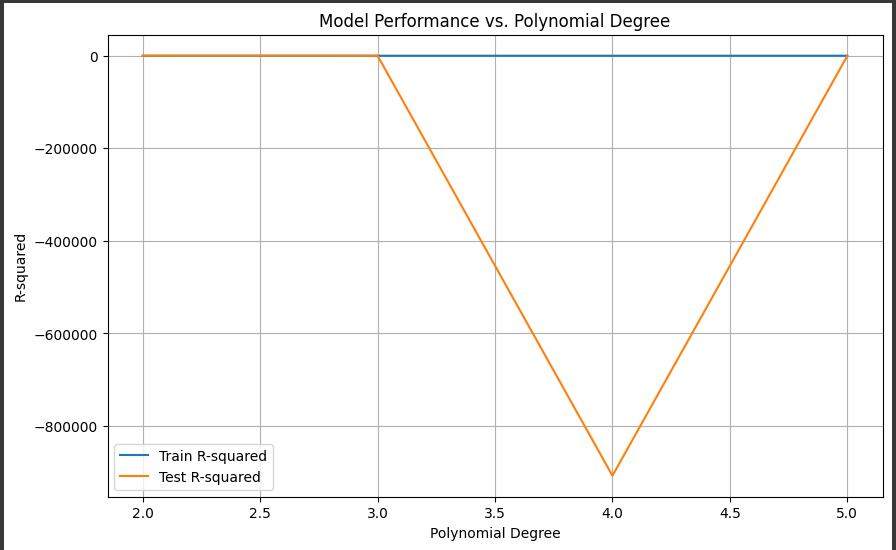

# 5. Next Steps


Despite rigorous testing, data manipulation, and optimization, our models achieved an average R² of approximately 47% on the best-performing runs, occasionally reaching up to 52% for outlier models. The dataset presented unique challenges that limited performance under linear modeling approaches. As seen in our residuals plots, our linear models don't fit the complex categorical features very well.

Our **next steps** are to:
1. Augment the dataset with synthetic data to improve model training.
2. Explore flexible modeling approaches, as the dataset's complexity suggests non-linear models (e.g., Ordinal Regression or Classification models) may yield better performance. Linear models were used here to align with course requirements.
3. Develop a more robust feature tracking system to maintain clear mappings of original feature names during transformation and handling processes.

Our goal is to achieve 90% predictive accuracy by addressing these challenges in future iterations.